<a href="https://colab.research.google.com/github/maxant38/Isolation_forest/blob/main/TP_ACP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP ACP 




# **Partie 1 – L’ACP sur l’espace de variables ℝp**

# **Q1)**

**Importation des données et des librairies**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
def vizualise_matrix(path):

    df = pd.read_csv(path, sep=";")

    df = df.iloc[: , 1:] # on enlève la dernière colonne car elle est vide en raisond des ; à la fin des lignes
    df = df.iloc[: , :-1] # on enlève la dernière colonne car elle est vide en raisond des ; à la fin des lignes

    return df

In [ ]:
df = vizualise_matrix('drive/MyDrive/data_PDE20.csv')

NameError: ignored

**Calcul des indicateurs statistiques**

In [ ]:
def calcul_indicateurs_statistiques(matrice):
  resultat = {}
  resultat["ecart-type"]  = matrice.std()
  resultat["variance"]   = matrice.var()
  resultat["covariance"] = matrice.cov() 
  return resultat

Text(0.5, 1.0, 'Matrice de covariance')

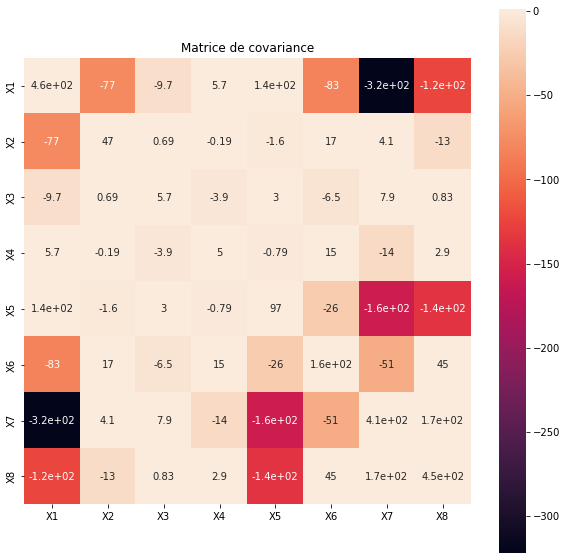

In [ ]:
resultats_indicateurs_stat  = calcul_indicateurs_statistiques(df)
 # on affiche la matrice de covariance pour l'exemple
plt.figure(figsize=(10,10))
sns.heatmap(resultats_indicateurs_stat["covariance"], vmax=1, square=True,annot=True)
plt.title('Matrice de covariance')

# **Q2)**

# ***En utilisant la librairie Sklearn***

## ***ACP CENTREE***

**Centrer le nuage**

In [ ]:
def centrer_data(matrice):
  return matrice.apply(lambda x: x -x.mean())

In [ ]:
df_centre = centrer_data(df)

In [ ]:
#vérification 
#moyenne
print(np.mean(df_centre,axis=0))

X1    1.749028e-14
X2    5.465713e-16
X3   -3.416071e-17
X4    2.562053e-16
X5    1.311771e-14
X6   -1.366428e-15
X7   -1.093143e-14
X8    0.000000e+00
dtype: float64


On va normer notre jeu de données pour éviter de gonfler l'impact des variables à forte variance sur le résultat.

**Recherche des hyperplans**

In [ ]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()
#calculs
df_acp = acp.fit_transform(df_centre)
#nombre de composantes calculées
print(acp.n_components_) 

8


Commentaires :
Le paramètre (svd_solver = ‘full’) indique l’algorithme utilisé pour la décomposition en valeurs singulières. Nous choisissons la méthode ‘’exacte’’, sélectionnée de toute manière par défaut pour l’appréhension des bases de taille réduite (car notre dataset a moins de 100 lignes et 10 colonnes). D’autres approches sont disponibles pour le traitement des grands ensembles de données. Le nombre de composantes (K) n’étant pas spécifié (n_components = None), il est par défaut égal au nombre de variables (K = 8).

**Vecteur propre & Lambda**

In [ ]:
vecteur_propre = acp.components_ 
print(vecteur_propre)
#Axes principaux dans l'espace des caractéristiques, représentant les directions de variance maximale dans les données. 
#Équivalemment, les vecteurs singuliers droits des données d'entrée centrées, parallèles à ses vecteurs propres.
# Les composantes sont triées par importance de variable expliqué

[[ 0.60539275 -0.0500844  -0.01037248  0.00983482  0.28056514 -0.06079617
  -0.59148925 -0.4455495 ]
 [-0.46057585  0.14552702  0.01695906 -0.02415864  0.08615008 -0.04896435
   0.19903558 -0.8463959 ]
 [ 0.35899134 -0.1926523   0.02300344 -0.0688537  -0.01138128 -0.75555925
   0.50349122 -0.06509683]
 [ 0.29692386 -0.56450104 -0.10113215  0.08740193 -0.38575855  0.51119286
   0.31388479 -0.25817924]
 [ 0.22595129  0.60463347 -0.30845313  0.1406196  -0.67045162 -0.07952234
  -0.04426669 -0.10323986]
 [ 0.00606195 -0.01097164  0.6406441  -0.62348321 -0.411776   -0.01822077
  -0.16676658 -0.05462725]
 [ 0.39108498  0.50375854  0.23129433 -0.15102139  0.36858932  0.39037608
   0.47814368  0.01011853]
 [ 0.01711004  0.03259484  0.65557811  0.74540396 -0.09999618 -0.05166338
  -0.01030685 -0.02145974]]


In [ ]:
lambdas = acp.singular_values_ #Les valeurs singulières correspondant à chacune des composantes sélectionnées.
print(lambdas)

[153.77351013  95.57347835  78.09789201  39.74254592  22.02262923
  11.65914518   9.38633214   4.87209219]


**Variance**

On peut s'assurer que l'on a bien calculer toutes les composantes en regardant le pourcentage de variable expliqué ( qui devrait être de 100%).

In [ ]:
print("Variance expliquée par les 8 composantes principales = ", int(sum(acp.explained_variance_ratio_ * 100)), "%")

Variance expliquée par les 8 composantes principales =  100 %


On peut afficher les variances expliqués par chacune des composantes principales :

In [ ]:
exp_var_acp = acp.explained_variance_ratio_
print(exp_var_acp)


[0.57404914 0.22174855 0.14806917 0.038344   0.01177401 0.00330004
 0.00213884 0.00057626]


On peut regrouper toutes ces données dans un dataframe.

In [ ]:
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8"]
df_acp_variance= pd.DataFrame(list_acp, columns = ["ACP"])
df_acp_variance['variance_explique'] = acp.explained_variance_
df_acp_variance

,ACP,variance_explique
0,CP1,945.851697
1,CP2,365.371591
2,CP3,243.971229
3,CP4,63.178798
4,CP5,19.399848
5,CP6,5.437427
6,CP7,3.524129
7,CP8,0.949491


On va visualiser ces valeurs :

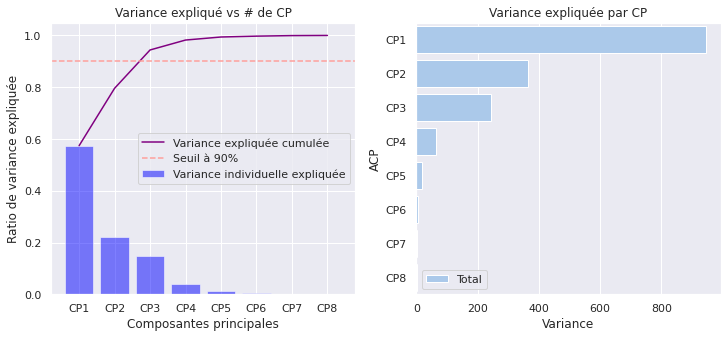

In [ ]:

# Somme cumulée des valeurs propre. Elle sera utilisé pour créer un step plot pour visualiser la variance expliquée par chaque composante principale.
sommme_cumule_var = np.cumsum(acp.explained_variance_ratio_)



sns.set(style="darkgrid")

# creation des deux graphes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# definition du graphe un
sns.set_color_codes("pastel")
sns.barplot(x="variance_explique", y="ACP", data=df_acp_variance,
            label="Total", color="b")
ax2.set_title("Variance expliquée par CP")
ax2.set_xlabel("Variance")
ax2.legend(loc='best')

# definition du graphe deux
ax1.plot(list_acp,sommme_cumule_var, color="purple", label='Variance expliquée cumulée')
ax1.bar(range(0,len(exp_var_acp)), exp_var_acp, alpha=0.5, align='center', label='Variance individuelle expliquée', color='blue')
ax1.axhline(y = 0.9, color = 'r', linestyle = '--',label='Seuil à 90%')
ax1.set_title("Variance expliqué vs # de CP")
ax1.set_ylabel('Ratio de variance expliquée')
ax1.set_xlabel("Composantes principales")
ax1.legend(loc='best')

# on affiche
plt.show()

## **ACP NORMEE**

Normalisation en utilisant Sklearn (donne une estimation biaisé, différent de la librairie Pandas)

In [ ]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
# La libraire Sklearn réalise une normalisation biaisé
df_norme = sc.fit_transform(df)

#vérification 
#moyenne
print(np.mean(df_norme,axis=0))

#écart-type
print(np.std(df_norme,axis=0))
print(df_norme)

[ 8.19857003e-16  8.11316826e-17  1.70803542e-17  9.39419482e-17
  1.36642834e-15 -6.83214169e-17 -5.50841424e-16  8.54017711e-18]
[1. 1. 1. 1. 1. 1. 1. 1.]
[[ 1.78462165e+00 -1.36575310e+00 -1.09360874e+00  1.82060133e-01
   3.33203311e-01 -1.59242947e+00 -3.78356343e-01  6.58124880e-02]
 [ 7.79065914e-01  7.69804707e-01  7.45949682e-01 -8.30005686e-01
   1.57851828e+00 -1.39862605e+00 -7.49044602e-01 -9.33952576e-02]
 [ 5.50552069e-01  2.06254729e-01 -1.09360874e+00  1.79773471e+00
   7.25150905e-01  8.84394364e-01 -1.22743283e+00 -2.05749072e-01]
 [ 5.18313601e-01 -1.43739468e-01  6.81629457e-01 -3.85241335e-01
   1.45305358e+00  8.55444475e-01 -1.36669139e+00 -2.41128571e-01]
 [-5.52193167e-01  9.04760096e-01  2.09947810e-01 -8.57236156e-01
  -3.08636796e-01 -6.88549602e-01  6.84116357e-01  4.02395830e-01]
 [-1.03766656e+00  1.46933678e-01  1.02747436e-01  2.45597897e-01
  -1.04794535e+00 -2.43104837e-02  1.13695715e+00  5.46304333e-01]
 [ 5.47707498e-01  1.92907492e-01 -1.09360874

On va normer notre jeu de données pour éviter de gonfler l'impact des variables à forte variance sur le résultat.

https://stackoverflow.com/questions/26414913/normalize-columns-of-a-dataframe

Commentaire : 
Les estimations biaisées de sklearn rendent-elles l'apprentissage automatique moins puissant ?
=> selon la documentation officiel : non. La documentation officielle de sklearn.preprocessing.scale indique que l'utilisation d'un estimateur biaisé a très peu de chances d'affecter les performances des algorithmes d'apprentissage automatique et que nous pouvons les utiliser en toute sécurité.

Extrait de la documentation officielle :

Nous utilisons un estimateur biaisé pour l'écart type, équivalent à numpy.std(x, ddof=0). Notez que le choix de ddof est peu susceptible d'affecter les performances du modèle.


**Recherche des hyperplans**

In [ ]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()
#calculs
df_acp = acp.fit_transform(df_norme)
#nombre de composantes calculées
print(acp.n_components_) 

8


**Vecteur propre & Lambda**

In [ ]:
vecteur_propre = acp.components_ 
print(vecteur_propre)
#Axes principaux dans l'espace des caractéristiques, représentant les directions de variance maximale dans les données. 
#Équivalemment, les vecteurs singuliers droits des données d'entrée centrées, parallèles à ses vecteurs propres.
# Les composantes sont triées par importance de variable expliqué

[[ 0.51231021 -0.15355972 -0.09804195  0.10650099  0.52700319 -0.0949529
  -0.52045143 -0.36794685]
 [ 0.02488858 -0.06089374  0.53501193 -0.62970728  0.15770896 -0.4946902
   0.1582935  -0.13511529]
 [-0.35986987  0.72794     0.18860062 -0.05053128  0.23732239  0.28517649
  -0.16406387 -0.37136092]
 [-0.08632254  0.19550278 -0.56627337  0.09400662 -0.07106699 -0.5541354
   0.3310255  -0.45069931]
 [-0.24099671 -0.55608913  0.12180942  0.02274981 -0.06395053  0.38672462
   0.22709614 -0.64195959]
 [ 0.20256688  0.05812786 -0.43043272 -0.71649613 -0.33617022  0.30026713
  -0.21196349 -0.09407176]
 [-0.43433125 -0.21220675 -0.38432628 -0.25789214  0.66935636  0.08682924
   0.11166275  0.28993757]
 [ 0.55875264  0.21667421  0.00988612 -0.01852057  0.2662425   0.33259327
   0.67720669  0.01716907]]


In [ ]:
lambdas = acp.singular_values_ #Les valeurs singulières correspondant à chacune des composantes sélectionnées.
print(lambdas)

[8.64198838 7.42265731 5.98611266 4.55684712 3.64546986 2.36350792
 1.53106081 0.63405648]


**Variance**

On peut s'assurer que l'on a bien calculer toutes les composantes en regardant le pourcentage de variable expliqué ( qui devrait être de 100%).

In [ ]:
print("Variance expliquée par les 8 composantes principales = ", int(sum(acp.explained_variance_ratio_ * 100)), "%")

Variance expliquée par les 8 composantes principales =  100 %


On peut afficher les variances expliqués par chacune des composantes principales :

In [ ]:
exp_var_acp = acp.explained_variance_ratio_
print(exp_var_acp)


[0.35905752 0.26488385 0.17227666 0.09983104 0.06389159 0.02685658
 0.01126994 0.00193283]


On peut regrouper toutes ces données dans un dataframe.

In [ ]:
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8"]
df_acp_variance= pd.DataFrame(list_acp, columns = ["ACP"])
df_acp_variance['variance_explique'] = acp.explained_variance_
df_acp_variance

,ACP,variance_explique
0,CP1,2.987359
1,CP2,2.203834
2,CP3,1.433342
3,CP4,0.830594
4,CP5,0.531578
5,CP6,0.223447
6,CP7,0.093766
7,CP8,0.016081


On va visualiser ces valeurs :

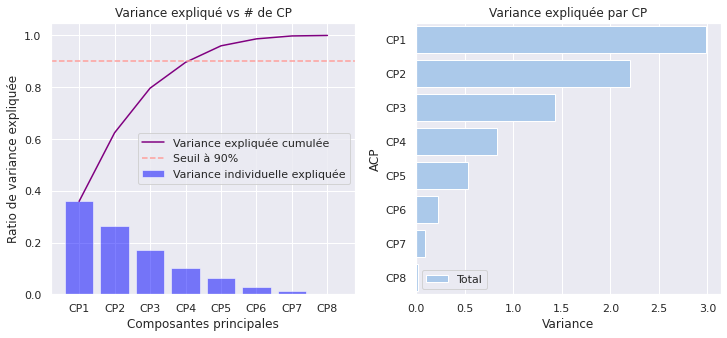

In [ ]:

# Somme cumulée des valeurs propre. Elle sera utilisé pour créer un step plot pour visualiser la variance expliquée par chaque composante principale.
somme_cumule_var = np.cumsum(acp.explained_variance_ratio_)



sns.set(style="darkgrid")

# creation des deux graphes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# definition du graphe un
sns.set_color_codes("pastel")
sns.barplot(x="variance_explique", y="ACP", data=df_acp_variance,
            label="Total", color="b")
ax2.set_title("Variance expliquée par CP")
ax2.set_xlabel("Variance")
ax2.legend(loc='best')

# definition du graphe deux
ax1.plot(list_acp,somme_cumule_var, color="purple", label='Variance expliquée cumulée')
ax1.bar(range(0,len(exp_var_acp)), exp_var_acp, alpha=0.5, align='center', label='Variance individuelle expliquée', color='blue')
ax1.axhline(y = 0.9, color = 'r', linestyle = '--',label='Seuil à 90%')
ax1.set_title("Variance expliqué vs # de CP")
ax1.set_ylabel('Ratio de variance expliquée')
ax1.set_xlabel("Composantes principales")
ax1.legend(loc='best')

# on affiche
plt.show()

In [ ]:
exp_var_acp

array([0.35905752, 0.26488385, 0.17227666, 0.09983104, 0.06389159,
       0.02685658, 0.01126994, 0.00193283])

# ***En utilisant les librairies Pandas et Numpy (plus fastidieux)***

## **ACP CENTREE**

**Centrer le nuage**

In [ ]:
def centrer_data(matrice):
  return matrice.apply(lambda x: x -x.mean())

In [ ]:
#Normalisation en utilisant la librairie pandas (donne des estimations non biaisées)
def normer_data(matrice):
  return df.apply(lambda x: (x-x.mean())/ x.std())

**Recherche des hyperplans**

In [ ]:
def ACP(matrice):

  acp = {}

  matrice = centrer_data(matrice) # on centre nos données

  # on cacule la matrice de covariance que l'on covertit en array
  matrice_cov = np.array(calcul_indicateurs_statistiques(matrice)["covariance"]) 

  # on calcule les vectuers propre et lambdas, ils ne sont pas triés
  lambdas,vecteur_propre=np.linalg.eig(matrice_cov) 
  
  # On les trie dans le sens décroissant en fonction de la variance
  index = lambdas.argsort()[::-1] 
  lambdas = lambdas[index]
  vecteur_propre = vecteur_propre[index]

  # calcul des variables expliquées
  total_lambdas = sum(lambdas)
  ratio_var_explique = [(i/total_lambdas) for i in lambdas]

  acp["lambdas"] = lambdas
  acp["vecteur propre"] = vecteur_propre
  acp["ratio_var_explique"] = ratio_var_explique
 
  return acp



In [ ]:
acp = ACP(df)
acp

{'lambdas': array([945.85169666, 365.37159054, 243.97122944,  63.17879825,
         19.39984792,   5.43742666,   3.52412924,   0.94949129]),
 'vecteur propre': array([[ 0.60539275, -0.46057585,  0.35899134,  0.29692386,  0.22595129,
         -0.01711004, -0.39108498,  0.00606195],
        [-0.0500844 ,  0.14552702, -0.1926523 , -0.56450104,  0.60463347,
         -0.03259484, -0.50375854, -0.01097164],
        [-0.01037248,  0.01695906,  0.02300344, -0.10113215, -0.30845313,
         -0.65557811, -0.23129433,  0.6406441 ],
        [ 0.00983482, -0.02415864, -0.0688537 ,  0.08740193,  0.1406196 ,
         -0.74540396,  0.15102139, -0.62348321],
        [ 0.28056514,  0.08615008, -0.01138128, -0.38575855, -0.67045162,
          0.09999618, -0.36858932, -0.411776  ],
        [-0.4455495 , -0.8463959 , -0.06509683, -0.25817924, -0.10323986,
          0.02145974, -0.01011853, -0.05462725],
        [-0.59148925,  0.19903558,  0.50349122,  0.31388479, -0.04426669,
          0.01030685, -0.4781

In [ ]:
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8"]
df_acp_variance= pd.DataFrame(list_acp, columns = ["ACP"])
df_acp_variance['variance_explique'] = acp["lambdas"]
df_acp_variance

,ACP,variance_explique
0,CP1,945.851697
1,CP2,365.371591
2,CP3,243.971229
3,CP4,63.178798
4,CP5,19.399848
5,CP6,5.437427
6,CP7,3.524129
7,CP8,0.949491


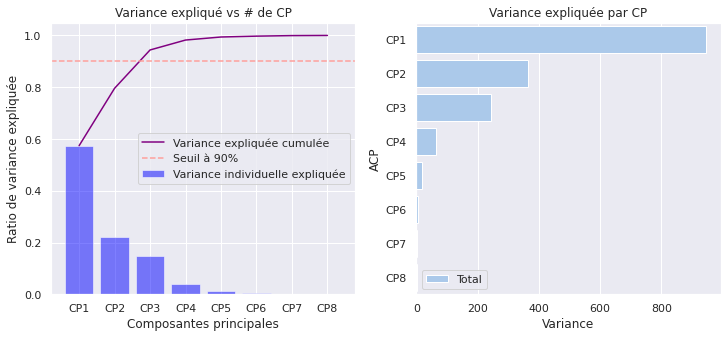

In [ ]:
# Somme cumulée des valeurs propre. Elle sera utilisé pour créer un step plot pour visualiser la variance expliquée par chaque composante principale.
sommme_cumule_var = np.cumsum(acp["ratio_var_explique"])



sns.set(style="darkgrid")

# creation des deux graphes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# definition du graphe un
sns.set_color_codes("pastel")
sns.barplot(x="variance_explique", y="ACP", data=df_acp_variance,
            label="Total", color="b")
ax2.set_title("Variance expliquée par CP")
ax2.set_xlabel("Variance")
ax2.legend(loc='best')

# definition du graphe deux
ax1.plot(list_acp,sommme_cumule_var, color="purple", label='Variance expliquée cumulée')
ax1.bar(range(0,len(acp["ratio_var_explique"] )), acp["ratio_var_explique"] , alpha=0.5, align='center', label='Variance individuelle expliquée', color='blue')
ax1.axhline(y = 0.9, color = 'r', linestyle = '--',label='Seuil à 90%')
ax1.set_title("Variance expliqué vs # de CP")
ax1.set_ylabel('Ratio de variance expliquée')
ax1.set_xlabel("Composantes principales")
ax1.legend(loc='best')

# on affiche
plt.show()

**Centrer le nuage**

In [ ]:
def centrer_data(matrice):
  return matrice.apply(lambda x: x -x.mean())

In [ ]:
#Normalisation en utilisant la librairie pandas (donne des estimations non biaisées)
def normer_data(matrice):
  return df.apply(lambda x: (x-x.mean())/ x.std())

**Recherche des hyperplans**

In [ ]:
def ACP(matrice):

  acp = {}

  matrice = centrer_data(matrice) # on centre nos données

  # on cacule la matrice de covariance que l'on covertit en array
  matrice_cov = np.array(calcul_indicateurs_statistiques(matrice)["covariance"]) 

  # on calcule les vectuers propre et lambdas, ils ne sont pas triés
  lambdas,vecteur_propre=np.linalg.eig(matrice_cov) 
  
  # On les trie dans le sens décroissant en fonction de la variance
  index = lambdas.argsort()[::-1] 
  lambdas = lambdas[index]
  vecteur_propre = vecteur_propre[index]

  # calcul des variables expliquées
  total_lambdas = sum(lambdas)
  ratio_var_explique = [(i/total_lambdas) for i in lambdas]

  acp["lambdas"] = lambdas
  acp["vecteur propre"] = vecteur_propre
  acp["ratio_var_explique"] = ratio_var_explique
 
  return acp



In [ ]:
acp = ACP(df)
acp

{'lambdas': array([945.85169666, 365.37159054, 243.97122944,  63.17879825,
         19.39984792,   5.43742666,   3.52412924,   0.94949129]),
 'vecteur propre': array([[ 0.60539275, -0.46057585,  0.35899134,  0.29692386,  0.22595129,
         -0.01711004, -0.39108498,  0.00606195],
        [-0.0500844 ,  0.14552702, -0.1926523 , -0.56450104,  0.60463347,
         -0.03259484, -0.50375854, -0.01097164],
        [-0.01037248,  0.01695906,  0.02300344, -0.10113215, -0.30845313,
         -0.65557811, -0.23129433,  0.6406441 ],
        [ 0.00983482, -0.02415864, -0.0688537 ,  0.08740193,  0.1406196 ,
         -0.74540396,  0.15102139, -0.62348321],
        [ 0.28056514,  0.08615008, -0.01138128, -0.38575855, -0.67045162,
          0.09999618, -0.36858932, -0.411776  ],
        [-0.4455495 , -0.8463959 , -0.06509683, -0.25817924, -0.10323986,
          0.02145974, -0.01011853, -0.05462725],
        [-0.59148925,  0.19903558,  0.50349122,  0.31388479, -0.04426669,
          0.01030685, -0.4781

In [ ]:
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8"]
df_acp_variance= pd.DataFrame(list_acp, columns = ["ACP"])
df_acp_variance['variance_explique'] = acp["lambdas"]
df_acp_variance

,ACP,variance_explique
0,CP1,945.851697
1,CP2,365.371591
2,CP3,243.971229
3,CP4,63.178798
4,CP5,19.399848
5,CP6,5.437427
6,CP7,3.524129
7,CP8,0.949491


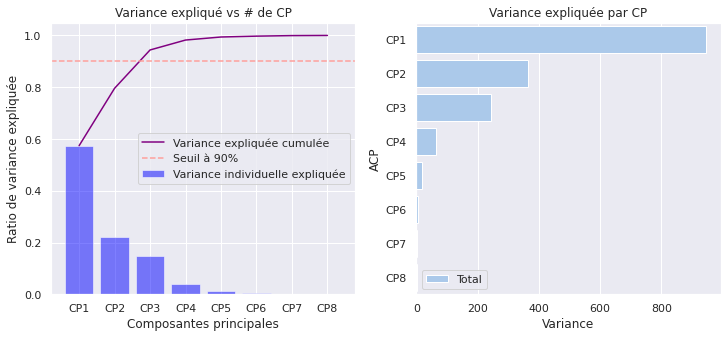

In [ ]:
# Somme cumulée des valeurs propre. Elle sera utilisé pour créer un step plot pour visualiser la variance expliquée par chaque composante principale.
sommme_cumule_var = np.cumsum(acp["ratio_var_explique"])



sns.set(style="darkgrid")

# creation des deux graphes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# definition du graphe un
sns.set_color_codes("pastel")
sns.barplot(x="variance_explique", y="ACP", data=df_acp_variance,
            label="Total", color="b")
ax2.set_title("Variance expliquée par CP")
ax2.set_xlabel("Variance")
ax2.legend(loc='best')

# definition du graphe deux
ax1.plot(list_acp,sommme_cumule_var, color="purple", label='Variance expliquée cumulée')
ax1.bar(range(0,len(acp["ratio_var_explique"])), acp["ratio_var_explique"], alpha=0.5, align='center', label='Variance individuelle expliquée', color='blue')
ax1.axhline(y = 0.9, color = 'r', linestyle = '--',label='Seuil à 90%')
ax1.set_title("Variance expliqué vs # de CP")
ax1.set_ylabel('Ratio de variance expliquée')
ax1.set_xlabel("Composantes principales")
ax1.legend(loc='best')

# on affiche
plt.show()

## **ACP NORMEE**

**Centrer le nuage**

In [ ]:
def centrer_data(matrice):
  return matrice.apply(lambda x: x -x.mean())

In [ ]:
#Normalisation en utilisant la librairie pandas (donne des estimations non biaisées)
def normer_data(matrice):
  return df.apply(lambda x: (x-x.mean())/ x.std())

**Recherche des hyperplans**

In [ ]:
def ACP(matrice):

  acp = {}

  matrice = centrer_data(matrice) # on centre nos données

  matrice = normer_data(matrice) # on norme nos données

  # on cacule la matrice de covariance que l'on covertit en array
  matrice_cov = np.array(calcul_indicateurs_statistiques(matrice)["covariance"]) 

  # on calcule les vectuers propre et lambdas, ils ne sont pas triés
  lambdas,vecteur_propre=np.linalg.eig(matrice_cov) 
  
  # On les trie dans le sens décroissant en fonction de la variance
  index = lambdas.argsort()[::-1] 
  lambdas = lambdas[index]
  vecteur_propre = vecteur_propre[index]

  # calcul des variables expliquées
  total_lambdas = sum(lambdas)
  ratio_var_explique = [(i/total_lambdas) for i in lambdas]

  acp["lambdas"] = lambdas
  acp["vecteur propre"] = vecteur_propre
  acp["ratio_var_explique"] = ratio_var_explique
 
  return acp



In [ ]:
acp = ACP(df)
acp

{'lambdas': array([2.87246012, 2.11907083, 1.37821326, 0.7986483 , 0.51113271,
        0.21485268, 0.09015951, 0.0154626 ]),
 'vecteur propre': array([[-0.51231021,  0.02488858, -0.35986987,  0.08632254, -0.24099671,
         -0.55875264,  0.43433125, -0.20256688],
        [ 0.15355972, -0.06089374,  0.72794   , -0.19550278, -0.55608913,
         -0.21667421,  0.21220675, -0.05812786],
        [ 0.09804195,  0.53501193,  0.18860062,  0.56627337,  0.12180942,
         -0.00988612,  0.38432628,  0.43043272],
        [-0.10650099, -0.62970728, -0.05053128, -0.09400662,  0.02274981,
          0.01852057,  0.25789214,  0.71649613],
        [-0.52700319,  0.15770896,  0.23732239,  0.07106699, -0.06395053,
         -0.2662425 , -0.66935636,  0.33617022],
        [ 0.36794685, -0.13511529, -0.37136092,  0.45069931, -0.64195959,
         -0.01716907, -0.28993757,  0.09407176],
        [ 0.52045143,  0.1582935 , -0.16406387, -0.3310255 ,  0.22709614,
         -0.67720669, -0.11166275,  0.2119634

In [ ]:
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8"]
df_acp_variance= pd.DataFrame(list_acp, columns = ["ACP"])
df_acp_variance['variance_explique'] = acp["lambdas"]
df_acp_variance

,ACP,variance_explique
0,CP1,2.872460
1,CP2,2.119071
2,CP3,1.378213
3,CP4,0.798648
4,CP5,0.511133
5,CP6,0.214853
6,CP7,0.090160
7,CP8,0.015463


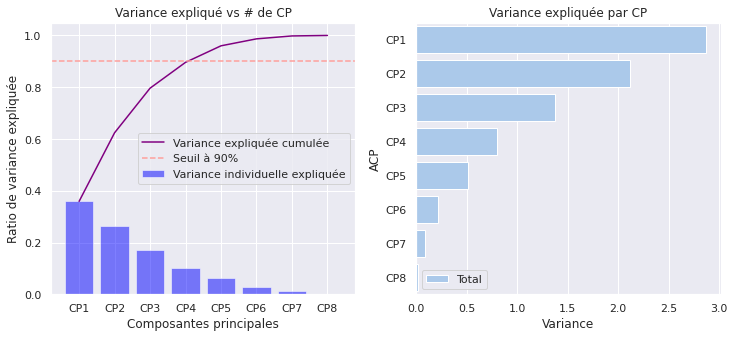

In [ ]:
# Somme cumulée des valeurs propre. Elle sera utilisé pour créer un step plot pour visualiser la variance expliquée par chaque composante principale.
sommme_cumule_var = np.cumsum(acp["ratio_var_explique"])



sns.set(style="darkgrid")

# creation des deux graphes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# definition du graphe un
sns.set_color_codes("pastel")
sns.barplot(x="variance_explique", y="ACP", data=df_acp_variance,
            label="Total", color="b")
ax2.set_title("Variance expliquée par CP")
ax2.set_xlabel("Variance")
ax2.legend(loc='best')

# definition du graphe deux
ax1.plot(list_acp,sommme_cumule_var, color="purple", label='Variance expliquée cumulée')
ax1.bar(range(0,len(acp["ratio_var_explique"] )), acp["ratio_var_explique"] , alpha=0.5, align='center', label='Variance individuelle expliquée', color='blue')
ax1.axhline(y = 0.9, color = 'r', linestyle = '--',label='Seuil à 90%')
ax1.set_title("Variance expliqué vs # de CP")
ax1.set_ylabel('Ratio de variance expliquée')
ax1.set_xlabel("Composantes principales")
ax1.legend(loc='best')

# on affiche
plt.show()

**Centrer le nuage**

In [ ]:
def centrer_data(matrice):
  return matrice.apply(lambda x: x -x.mean())

In [ ]:
#Normalisation en utilisant la librairie pandas (donne des estimations non biaisées)
def normer_data(matrice):
  return df.apply(lambda x: (x-x.mean())/ x.std())

**Recherche des hyperplans**

In [ ]:
def ACP(matrice):

  acp = {}

  matrice = centrer_data(matrice) # on centre nos données

  # on cacule la matrice de covariance que l'on covertit en array
  matrice_cov = np.array(calcul_indicateurs_statistiques(matrice)["covariance"]) 

  # on calcule les vectuers propre et lambdas, ils ne sont pas triés
  lambdas,vecteur_propre=np.linalg.eig(matrice_cov) 
  
  # On les trie dans le sens décroissant en fonction de la variance
  index = lambdas.argsort()[::-1] 
  lambdas = lambdas[index]
  vecteur_propre = vecteur_propre[index]

  # calcul des variables expliquées
  total_lambdas = sum(lambdas)
  ratio_var_explique = [(i/total_lambdas) for i in lambdas]

  acp["lambdas"] = lambdas
  acp["vecteur propre"] = vecteur_propre
  acp["ratio_var_explique"] = ratio_var_explique
 
  return acp



In [ ]:
acp = ACP(df)
acp

{'lambdas': array([945.85169666, 365.37159054, 243.97122944,  63.17879825,
         19.39984792,   5.43742666,   3.52412924,   0.94949129]),
 'vecteur propre': array([[ 0.60539275, -0.46057585,  0.35899134,  0.29692386,  0.22595129,
         -0.01711004, -0.39108498,  0.00606195],
        [-0.0500844 ,  0.14552702, -0.1926523 , -0.56450104,  0.60463347,
         -0.03259484, -0.50375854, -0.01097164],
        [-0.01037248,  0.01695906,  0.02300344, -0.10113215, -0.30845313,
         -0.65557811, -0.23129433,  0.6406441 ],
        [ 0.00983482, -0.02415864, -0.0688537 ,  0.08740193,  0.1406196 ,
         -0.74540396,  0.15102139, -0.62348321],
        [ 0.28056514,  0.08615008, -0.01138128, -0.38575855, -0.67045162,
          0.09999618, -0.36858932, -0.411776  ],
        [-0.4455495 , -0.8463959 , -0.06509683, -0.25817924, -0.10323986,
          0.02145974, -0.01011853, -0.05462725],
        [-0.59148925,  0.19903558,  0.50349122,  0.31388479, -0.04426669,
          0.01030685, -0.4781

In [ ]:
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8"]
df_acp_variance= pd.DataFrame(list_acp, columns = ["ACP"])
df_acp_variance['variance_explique'] = acp["lambdas"]
df_acp_variance

,ACP,variance_explique
0,CP1,945.851697
1,CP2,365.371591
2,CP3,243.971229
3,CP4,63.178798
4,CP5,19.399848
5,CP6,5.437427
6,CP7,3.524129
7,CP8,0.949491


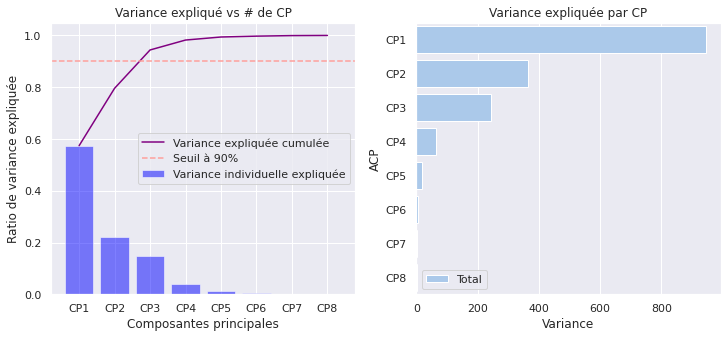

In [ ]:
# Somme cumulée des valeurs propre. Elle sera utilisé pour créer un step plot pour visualiser la variance expliquée par chaque composante principale.
sommme_cumule_var = np.cumsum(acp["ratio_var_explique"])



sns.set(style="darkgrid")

# creation des deux graphes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# definition du graphe un
sns.set_color_codes("pastel")
sns.barplot(x="variance_explique", y="ACP", data=df_acp_variance,
            label="Total", color="b")
ax2.set_title("Variance expliquée par CP")
ax2.set_xlabel("Variance")
ax2.legend(loc='best')

# definition du graphe deux
ax1.plot(list_acp,sommme_cumule_var, color="purple", label='Variance expliquée cumulée')
ax1.bar(range(0,len(acp["ratio_var_explique"])), acp["ratio_var_explique"], alpha=0.5, align='center', label='Variance individuelle expliquée', color='blue')
ax1.axhline(y = 0.9, color = 'r', linestyle = '--',label='Seuil à 90%')
ax1.set_title("Variance expliqué vs # de CP")
ax1.set_ylabel('Ratio de variance expliquée')
ax1.set_xlabel("Composantes principales")
ax1.legend(loc='best')

# on affiche
plt.show()

# **PARTIE 2 - Qualité de l’ACP**

# **Q3)**

On réalise le Scree plot pour utiliser la règle de Cattell

***Cas centrée***

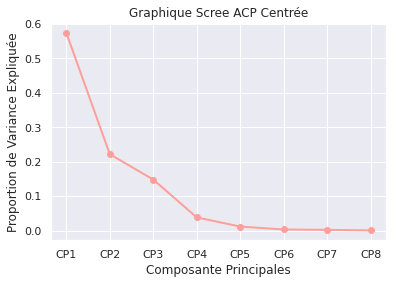

In [ ]:
PC_values = np.arange(acp.n_components_) + 1
plt.plot(list_acp, acp.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Graphique Scree ACP Centrée')
plt.xlabel('Composante Principales')
plt.ylabel('Proportion de Variance Expliquée')
plt.show()

***Cas normée***

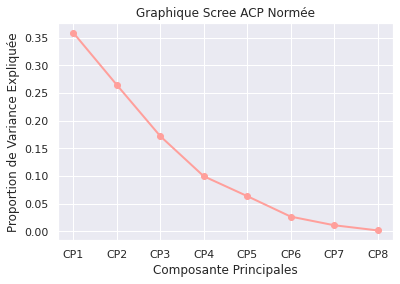

In [ ]:
PC_values = np.arange(acp.n_components_) + 1
plt.plot(list_acp, acp.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Graphique Scree ACP Normée')
plt.xlabel('Composante Principales')
plt.ylabel('Proportion de Variance Expliquée')
plt.show()

# **Q4)**

## ***ACP CENTREE***

In [ ]:
#On prendra k de 2 à 4 pour traiter les cas centrée et normée
Vecteur_Propre= pd.DataFrame(acp["vecteur propre"],columns=["X1","X2","X3","X4","X5","X6","X7","X8"]) # matrice des vecteurs propres
X_centree = centrer_data(df) # matrice de nos donnees initiales centrees
n = X_centree.shape[0]
p = X_centree.shape[1]

Vecteur_Propre.shape
#Changement de Base 
X_centree_nouvelle_base = X_centree.dot(Vecteur_Propre.to_numpy())# .dot permet de faire le produit matriciel sur des dataframes

#Qualité de la projection cas centrée, on utilise la formule de l'énoncé

Qualité_individus_centree =  [[0]*n,[0]*n,[0]*n]

for k in range(3,6): 
  for i in range (0,n):
   denominateur = sum(X_centree_nouvelle_base.iloc[i]**2)
   numerateur = 0
   for j in range(0,k):
      numerateur  = numerateur + X_centree_nouvelle_base.iloc[i,j]**2
   Qualité_individus_centree[k-3][i] = numerateur/denominateur 


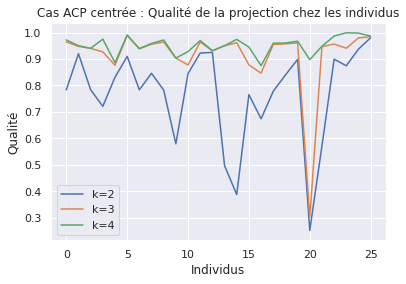

In [ ]:
#creation du graphique
plt.plot(Qualité_individus_centree[0], label="k=2")
plt.plot(Qualité_individus_centree[1], label="k=3")
plt.plot(Qualité_individus_centree[2], label="k=4")
plt.title("Cas ACP centrée : Qualité de la projection chez les individus")
plt.xlabel("Individus")
plt.ylabel("Qualité")
plt.legend(loc='best')




## ***ACP NORMEE***

In [ ]:
Vecteur_Propre= pd.DataFrame(acp["vecteur propre"],columns=["X1","X2","X3","X4","X5","X6","X7","X8"]) # matrice des vecteurs propres
X_centree = centrer_data(df) # matrice de nos donnees initiales centrees
X_normee = normer_data(X_centree) # matrice de nos donnees initiales normee
n = X_centree.shape[0]
p = X_centree.shape[1]

Vecteur_Propre.shape
#Changement de Base 
X_normee_nouvelle_base = X_normee.dot(Vecteur_Propre.to_numpy())# .dot permet de faire le produit matriciel sur des dataframes

#Qualité de la projection cas centrée, on utilise la formule de l'énoncé

Qualité_individus_normee =  [[0]*n,[0]*n,[0]*n]

for k in range(3,6): 
  for i in range (0,n):
   denominateur = sum(X_normee_nouvelle_base.iloc[i]**2)
   numerateur = 0
   for j in range(0,k):
      numerateur  = numerateur + X_normee_nouvelle_base.iloc[i,j]**2
   Qualité_individus_normee[k-3][i] = numerateur/denominateur 


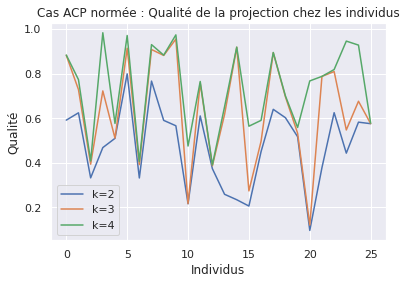

In [ ]:
plt.plot(Qualité_individus_normee[0], label="k=2")
plt.plot(Qualité_individus_normee[1], label="k=3")
plt.plot(Qualité_individus_normee[2], label="k=4")

plt.title("Cas ACP normée : Qualité de la projection chez les individus")
plt.xlabel("Individus")
plt.ylabel("Qualité")
plt.legend(loc='best')




# **Q5)**

## ***ACP CENTREE***

In [ ]:
Vecteur_Propre= pd.DataFrame(acp["vecteur propre"],columns=["X1","X2","X3","X4","X5","X6","X7","X8"]) # matrice des vecteurs propres
X_centree = centrer_data(df) # matrice de nos donnees initiales centrees
n = X_centree.shape[0]
p = X_centree.shape[1]

#Changement de Base 
X_centree_nouvelle_base = X_centree.dot(Vecteur_Propre.to_numpy())# .dot permet de faire le produit matriciel sur des dataframes


ContributionCentrée = np.zeros((n,p))
for i in range(0,n):
  for j in range(0,p):
    ContributionCentrée[i,j] = ((1/n)*X_centree_nouvelle_base.iloc[i,j]**2)/Vecteur_Propre.iloc[j,j]

ContributionCentrée = pd.DataFrame(ContributionCentrée)

<function matplotlib.pyplot.show(*args, **kw)>

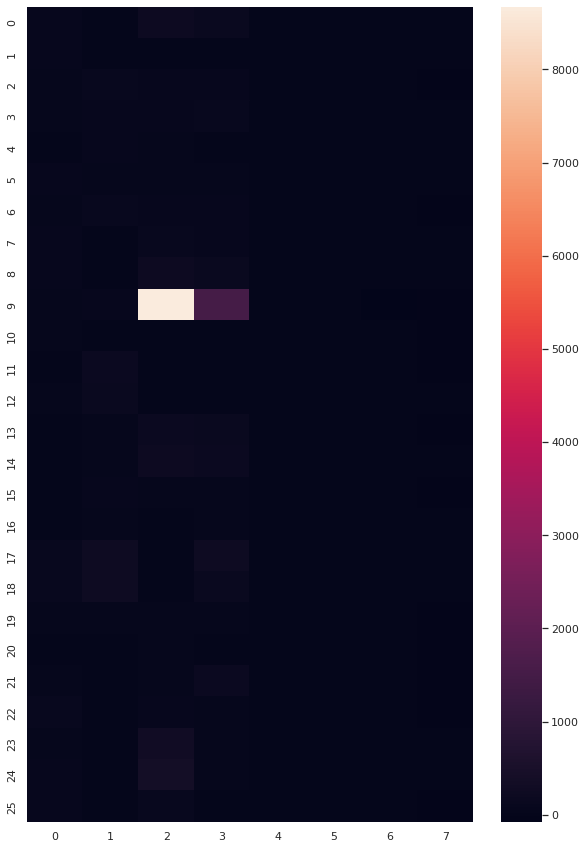

In [ ]:
plt_heatmap = plt.figure(figsize=(10,15))
sns.heatmap(ContributionCentrée)
plt.show

In [ ]:
ContributionCentrée.iloc[:,2] 
# on voit que l'observation 9 à une forte contribution sur la CP3

0      225.403029
1        0.001382
2       66.605070
3       72.207514
4       28.203451
5       44.362549
6       66.678766
7       99.531634
8      225.678954
9     8670.898614
10      21.237479
11      21.042050
12       2.766690
13     175.440358
14     219.875637
15      28.973673
16       5.674677
17       0.463867
18      11.456437
19      43.854326
20      26.070526
21      22.093076
22      78.418742
23     321.553416
24     373.265541
25     116.427053
Name: 2, dtype: float64

## ***ACP NORMEE***

In [ ]:
Vecteur_Propre= pd.DataFrame(acp["vecteur propre"],columns=["X1","X2","X3","X4","X5","X6","X7","X8"]) # matrice des vecteurs propres
X_centree = centrer_data(df) # matrice de nos donnees initiales centrees
X_normee = normer_data(X_centree)
n = X_centree.shape[0]
p = X_centree.shape[1]

#Changement de Base 
X_normee_nouvelle_base = X_normee.dot(Vecteur_Propre.to_numpy())# .dot permet de faire le produit matriciel sur des dataframes


ContributionNormée = np.zeros((n,p))
for i in range(0,n):
  for j in range(0,p):
    ContributionNormée[i,j] = ((1/n)*X_normee_nouvelle_base.iloc[i,j]**2)/Vecteur_Propre.iloc[j,j]
ContributionNormée = pd.DataFrame(ContributionNormée)



TypeError: ignored

<function matplotlib.pyplot.show(*args, **kw)>

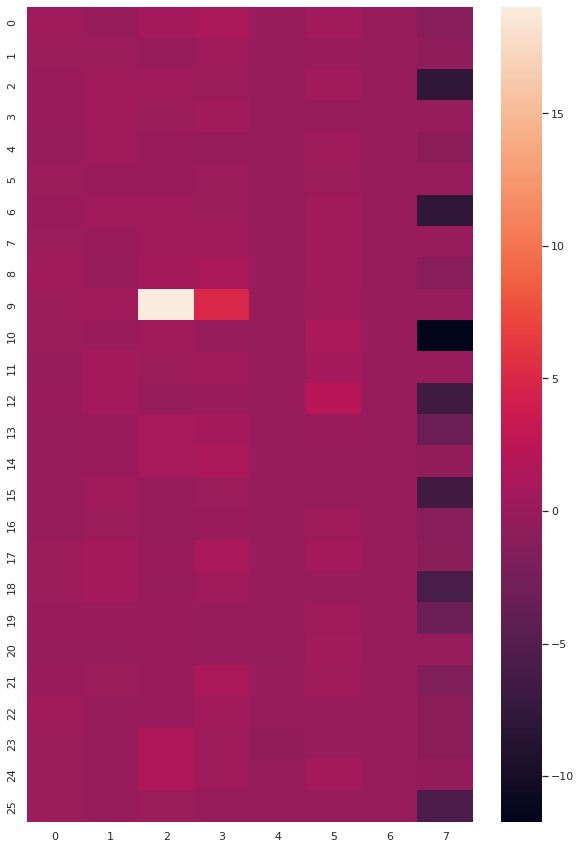

In [ ]:
plt_heatmap = plt.figure(figsize=(10,15))
sns.heatmap(ContributionNormée)
plt.show

In [ ]:
ContributionNormée.iloc[:,2]
# on voit que l'observation 9 à une forte contribution sur la CP3

0      0.846747
1      0.001243
2      0.433715
3      0.166885
4      0.077766
5      0.094289
6      0.430785
7      0.420466
8      0.846669
9     19.019212
10     0.292831
11     0.169616
12     0.023904
13     0.911451
14     0.924294
15     0.006241
16     0.007231
17     0.058501
18     0.004588
19     0.081382
20     0.119367
21     0.119636
22     0.067416
23     1.623589
24     1.695292
25     0.170012
Name: 2, dtype: float64

# **Q6)**

## **ACP CENTREE**

In [ ]:
#Avec Sklearn

#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()
#calculs
df_acp = acp.fit_transform(df)
vecteur_propre = acp.components_ 

X_centree = centrer_data(df) # matrice de nos donnees initiales centrees
n = X_centree.shape[0]
p = X_centree.shape[1]

#Changement de Base 
X_centree_nouvelle_baseSK = X_centree.dot(vecteur_propre)# .dot permet de faire le produit matriciel sur des dataframes
#Recuperation des coordonnes dans les deux composantes du premier plan factoriel
X_CP1_Sklearn = X_centree_nouvelle_baseSK.iloc[:,1]
X_CP2_Sklearn = X_centree_nouvelle_baseSK.iloc[:,2]

##########################################################################

#Avec Numpy & Pandas
def ACP(matrice):

  acp = {}

  matrice = centrer_data(matrice) # on centre nos données

  # on cacule la matrice de covariance que l'on covertit en array
  matrice_cov = np.array(calcul_indicateurs_statistiques(matrice)["covariance"]) 

  # on calcule les vectuers propre et lambdas, ils ne sont pas triés
  lambdas,vecteur_propre=np.linalg.eig(matrice_cov) 
  
  # On les trie dans le sens décroissant en fonction de la variance
  index = lambdas.argsort()[::-1] 
  lambdas = lambdas[index]
  vecteur_propre = vecteur_propre[index]

  # calcul des variables expliquées
  total_lambdas = sum(lambdas)
  ratio_var_explique = [(i/total_lambdas) for i in lambdas]

  acp["lambdas"] = lambdas
  acp["vecteur propre"] = vecteur_propre
  acp["ratio_var_explique"] = ratio_var_explique
 
  return acp

acpNP = ACP(df)

Vecteur_Propre= pd.DataFrame(acpNP["vecteur propre"],columns=["X1","X2","X3","X4","X5","X6","X7","X8"]) # matrice des vecteurs propres
X_centree = centrer_data(df) # matrice de nos donnees initiales centrees
#Changement de Base 
X_centree_nouvelle_base = X_centree.dot(Vecteur_Propre.to_numpy())# .dot permet de faire le produit matriciel sur des dataframes
#Recuperation des coordonnes dans les deux composantes du premier plan factoriel
X_CP1_NP = X_centree_nouvelle_base.iloc[:,1]
X_CP2_NP = X_centree_nouvelle_base.iloc[:,2]






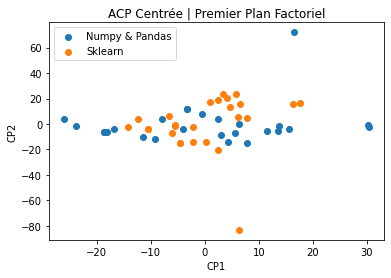

In [ ]:

plt.scatter(X_CP1_NP,X_CP2_NP, label="Numpy & Pandas")
plt.scatter(X_CP1_Sklearn,X_CP2_Sklearn, label="Sklearn")
plt.title("ACP Centrée | Premier Plan Factoriel")
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.legend(loc="best")



## **ACP NORMEE**

In [ ]:
#Avec Sklearn

from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
# La libraire Sklearn réalise une normalisation biaisé
df_norme = sc.fit_transform(df)



#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()
#calculs
df_acp = acp.fit_transform(df_norme)
vecteur_propre = acp.components_ 

#Changement de Base 
df_norme_NB= df_norme.dot(vecteur_propre)# .dot permet de faire le produit matriciel sur des dataframes
df_norme_NB = pd.DataFrame(df_norme_NB)
#Recuperation des coordonnes dans les deux composantes du premier plan factoriel
X_CP1_Sklearn = df_norme_NB.iloc[:,1]
X_CP2_Sklearn = df_norme_NB.iloc[:,2]

##########################################################################

#Avec Numpy & Pandas
def ACP(matrice):

  acp = {}

  matrice = centrer_data(matrice) # on centre nos données
  matrice = normer_data(matrice) # on norme nos données

  # on cacule la matrice de covariance que l'on covertit en array
  matrice_cov = np.array(calcul_indicateurs_statistiques(matrice)["covariance"]) 

  # on calcule les vectuers propre et lambdas, ils ne sont pas triés
  lambdas,vecteur_propre=np.linalg.eig(matrice_cov) 
  
  # On les trie dans le sens décroissant en fonction de la variance
  index = lambdas.argsort()[::-1] 
  lambdas = lambdas[index]
  vecteur_propre = vecteur_propre[index]

  # calcul des variables expliquées
  total_lambdas = sum(lambdas)
  ratio_var_explique = [(i/total_lambdas) for i in lambdas]

  acp["lambdas"] = lambdas
  acp["vecteur propre"] = vecteur_propre
  acp["ratio_var_explique"] = ratio_var_explique
 
  return acp

acp = ACP(df)

Vecteur_Propre= pd.DataFrame(acp["vecteur propre"],columns=["X1","X2","X3","X4","X5","X6","X7","X8"]) # matrice des vecteurs propres
X_centree = centrer_data(df) # matrice de nos donnees initiales centrees
X_normee = normer_data(df)
#Changement de Base 
X_normee_nouvelle_base = X_normee.dot(Vecteur_Propre.to_numpy())# .dot permet de faire le produit matriciel sur des dataframes
#Recuperation des coordonnes dans les deux composantes du premier plan factoriel
X_CP1_NP = X_normee_nouvelle_base.iloc[:,1]
X_CP2_NP = X_normee_nouvelle_base .iloc[:,2]






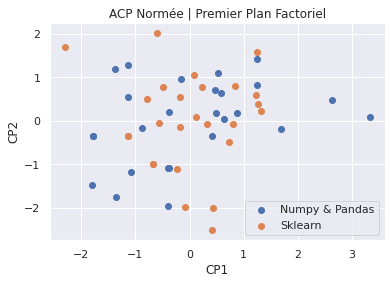

In [ ]:
sns.set(style="darkgrid")
plt.scatter(X_CP1_NP,X_CP2_NP, label="Numpy & Pandas")
plt.scatter(X_CP1_Sklearn,X_CP2_Sklearn, label="Sklearn")
plt.title("ACP Normée | Premier Plan Factoriel")
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.legend(loc="best")



# **Q7)**

## **ACP CENTREE**

In [ ]:
#Avec Sklearn


X_centree = centrer_data(df) # matrice de nos donnees initiales centrees
n = X_centree.shape[0]
p = X_centree.shape[1]


#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()
#calculs
df_acp = acp.fit_transform(df)
vecteur_propre = acp.components_ 


#Changement de Base 
X_centree_nouvelle_base = X_centree.dot(vecteur_propre)# .dot permet de faire le produit matriciel sur des dataframes
#Recuperation des coordonnes dans les deux composantes du premier plan factoriel
X_CP1_Sklearn = X_centree_nouvelle_base.iloc[:,1]
X_CP2_Sklearn = X_centree_nouvelle_base.iloc[:,2]
X_CP3_Sklearn = X_centree_nouvelle_base.iloc[:,3]
X_CP4_Sklearn = X_centree_nouvelle_base.iloc[:,4]

Noms= ["CP1","CP2","CP3"]
#Creating a dictionary by passing Series objects as values
frame = { 'CP1': X_CP1_Sklearn, 'CP2': X_CP2_Sklearn, 'CP3': X_CP3_Sklearn}
#Creating DataFrame by passing Dictionary
result = pd.DataFrame(frame)


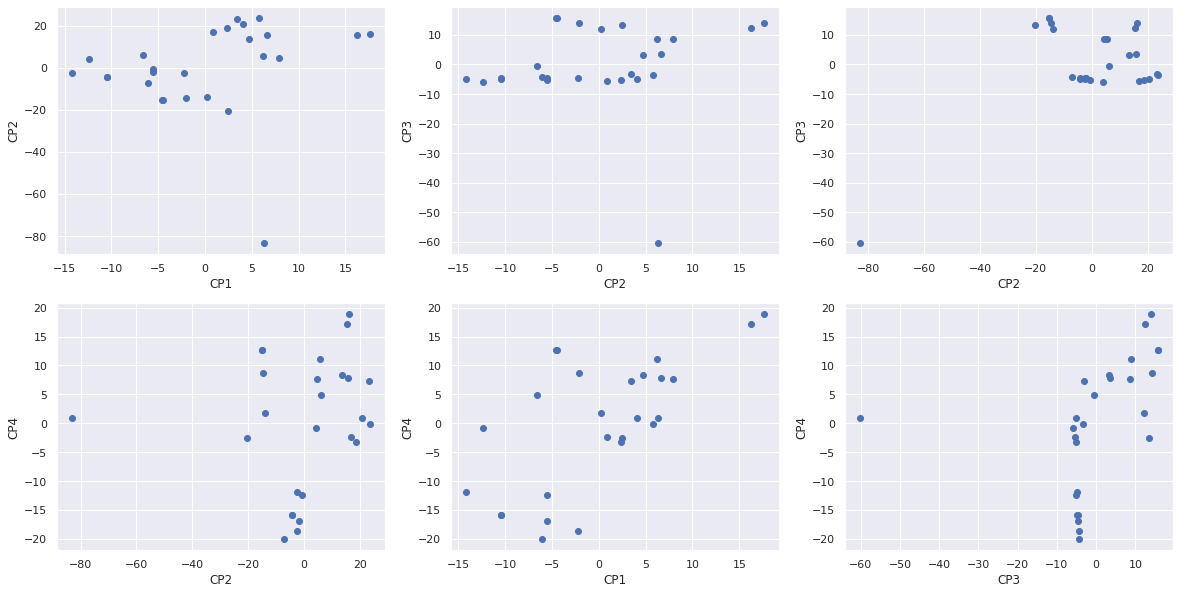

In [ ]:



sns.set(style="darkgrid")

# creation des deux graphes
fig, axs =  plt.subplots(2, 3, figsize = (20, 10) )

axs[0,0].scatter(X_CP1_Sklearn,X_CP2_Sklearn, label="Sklearn")
axs[0,0].set_xlabel("CP1")
axs[0,0].set_ylabel("CP2")

axs[0,1].scatter(X_CP1_Sklearn,X_CP3_Sklearn, label="Sklearn")
axs[0,1].set_xlabel("CP2")
axs[0,1].set_ylabel("CP3")


axs[1,1].scatter(X_CP1_Sklearn,X_CP4_Sklearn, label="Sklearn")
axs[1,1].set_xlabel("CP1")
axs[1,1].set_ylabel("CP4")


axs[0,2].scatter(X_CP2_Sklearn,X_CP3_Sklearn, label="Sklearn")
axs[0,2].set_xlabel("CP2")
axs[0,2].set_ylabel("CP3")


axs[1,0].scatter(X_CP2_Sklearn,X_CP4_Sklearn, label="Sklearn")
axs[1,0].set_xlabel("CP2")
axs[1,0].set_ylabel("CP4")


axs[1,2].scatter(X_CP3_Sklearn,X_CP4_Sklearn, label="Sklearn")
axs[1,2].set_xlabel("CP3")
axs[1,2].set_ylabel("CP4")


# on affiche
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(result, x= "CP1", y="CP2", z="CP3")
fig.show()

## **ACP NORMEE**

In [ ]:
#Avec Sklearn
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
# La libraire Sklearn réalise une normalisation biaisé
df_norme = sc.fit_transform(df)

#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()
#calculs
df_acp = acp.fit_transform(df_norme)
vecteur_propre = acp.components_ 
#Changement de Base 
X_normee_nouvelle_base = df_norme.dot(vecteur_propre)# .dot permet de faire le produit matriciel sur des dataframes

X_normee_nouvelle_base = pd.DataFrame(X_normee_nouvelle_base)
#Recuperation des coordonnes dans les deux composantes du premier plan factoriel
X_CP1_Sklearn = X_normee_nouvelle_base.iloc[:,1]
X_CP2_Sklearn = X_normee_nouvelle_base.iloc[:,2]
X_CP3_Sklearn = X_normee_nouvelle_base.iloc[:,3]
X_CP4_Sklearn = X_normee_nouvelle_base.iloc[:,4]

Noms= ["CP1","CP2","CP3"]
#Creating a dictionary by passing Series objects as values
frame = { 'CP1': X_CP1_Sklearn, 'CP2': X_CP2_Sklearn, 'CP3': X_CP3_Sklearn}
#Creating DataFrame by passing Dictionary
result = pd.DataFrame(frame)


In [ ]:
import plotly.express as px
fig = px.scatter_3d(result, x= "CP1", y="CP2", z="CP3")
fig.show()

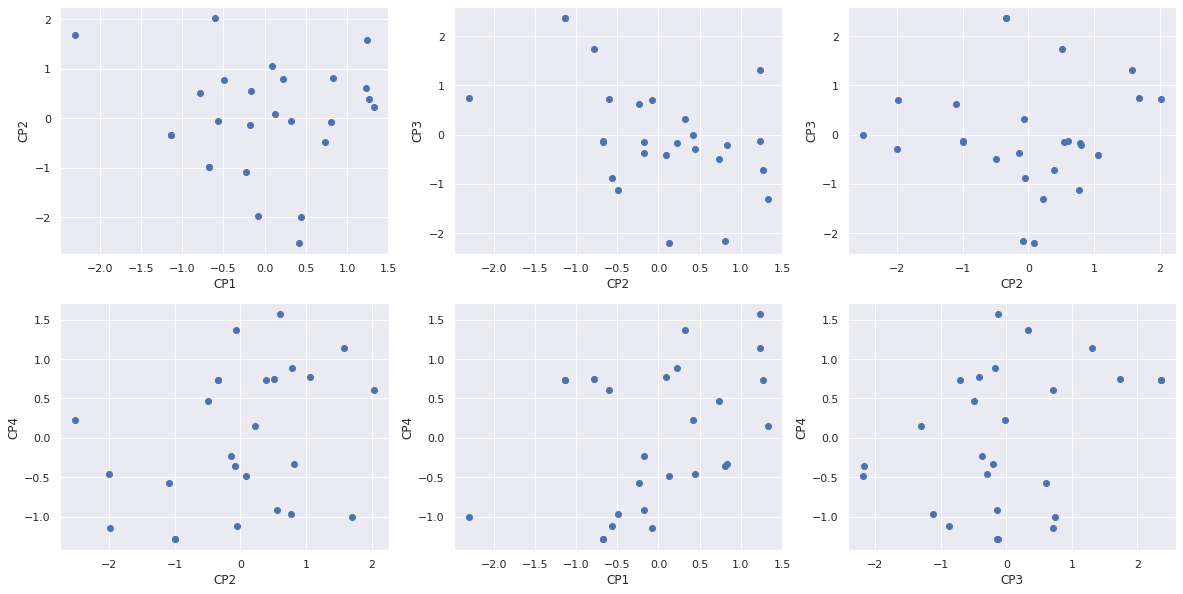

In [ ]:



sns.set(style="darkgrid")

# creation des deux graphes
fig, axs =  plt.subplots(2, 3, figsize = (20, 10) )

axs[0,0].scatter(X_CP1_Sklearn,X_CP2_Sklearn, label="Sklearn")
axs[0,0].set_xlabel("CP1")
axs[0,0].set_ylabel("CP2")

axs[0,1].scatter(X_CP1_Sklearn,X_CP3_Sklearn, label="Sklearn")
axs[0,1].set_xlabel("CP2")
axs[0,1].set_ylabel("CP3")


axs[1,1].scatter(X_CP1_Sklearn,X_CP4_Sklearn, label="Sklearn")
axs[1,1].set_xlabel("CP1")
axs[1,1].set_ylabel("CP4")


axs[0,2].scatter(X_CP2_Sklearn,X_CP3_Sklearn, label="Sklearn")
axs[0,2].set_xlabel("CP2")
axs[0,2].set_ylabel("CP3")


axs[1,0].scatter(X_CP2_Sklearn,X_CP4_Sklearn, label="Sklearn")
axs[1,0].set_xlabel("CP2")
axs[1,0].set_ylabel("CP4")


axs[1,2].scatter(X_CP3_Sklearn,X_CP4_Sklearn, label="Sklearn")
axs[1,2].set_xlabel("CP3")
axs[1,2].set_ylabel("CP4")


# on affiche
plt.show()